#📌 Extracción

In [48]:
import numpy as np

In [28]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df_expanded = pd.json_normalize(df.to_dict(orient="records")) #Necesita un diccionario nativo para comenzar a aplanar los datos
df_expanded.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4689,6421-SZVEM,No,Female,0,Yes,Yes,28,Yes,No,Fiber optic,...,No,No,No,No,Yes,One year,Yes,Bank transfer (automatic),82.85,2320.8
1156,1641-BYBTK,No,Male,0,No,Yes,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,98.35
7169,9853-JFZDU,No,Female,0,Yes,No,35,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,56.85,1861.1
2688,3727-OWVYD,No,Male,0,No,No,35,Yes,No,DSL,...,Yes,Yes,No,No,No,One year,No,Mailed check,61.20,2021.2
747,1069-XAIEM,Yes,Female,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.05,85.05


#🔧 Transformación

## Renombrando columnas

In [68]:
df_expanded.columns = [col.replace(".", "_").lower() for col in df_expanded.columns]
df_expanded

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Verificando si hay valores nulos/ausentes/nan

In [69]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

## Verificando si hay valores duplicados

In [70]:
duplicados = df_expanded.duplicated()
duplicados.sum()

np.int64(0)

## Inconsistencias datos no corresponde

In [71]:
columnas_de_interes = list(df_expanded.columns)
columnas_de_interes

['customerid',
 'churn',
 'customer_gender',
 'customer_seniorcitizen',
 'customer_partner',
 'customer_dependents',
 'customer_tenure',
 'phone_phoneservice',
 'phone_multiplelines',
 'internet_internetservice',
 'internet_onlinesecurity',
 'internet_onlinebackup',
 'internet_deviceprotection',
 'internet_techsupport',
 'internet_streamingtv',
 'internet_streamingmovies',
 'account_contract',
 'account_paperlessbilling',
 'account_paymentmethod',
 'account_charges_monthly',
 'account_charges_total']

In [72]:
valores_unicos = {col: df_expanded[col].unique() for col in df_expanded.columns}
valores_unicos

{'customerid': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'churn': array(['No', 'Yes', nan], dtype=object),
 'customer_gender': array(['Female', 'Male'], dtype=object),
 'customer_seniorcitizen': array([0, 1]),
 'customer_partner': array(['Yes', 'No'], dtype=object),
 'customer_dependents': array(['Yes', 'No'], dtype=object),
 'customer_tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'phone_phoneservice': array(['Yes', 'No'], dtype=object),
 'phone_multiplelines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'internet_internetservice': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'internet_onlinesecur

In [73]:
vacios = (df_expanded == '').sum()
vacios

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [98]:
df_expanded.replace('', np.nan, inplace=True)
vacios = (df_expanded == '').sum()
vacios

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [88]:
datos_limpio = df_expanded.copy()

In [89]:
datos_limpio = df_expanded.dropna()
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

## Inconsistencias cruce entre columnas

In [90]:
internet_cols = list(datos_limpio.columns[9:15])

In [91]:
mask = datos_limpio["internet_internetservice"] == "No"

In [92]:
inconsistencias = datos_limpio.loc[mask, internet_cols].apply(lambda x: x != "No internet service")
inconsistencias.head(10)

,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv
20,True,False,False,False,False,False
23,True,False,False,False,False,False
24,True,False,False,False,False,False
27,True,False,False,False,False,False
28,True,False,False,False,False,False
29,True,False,False,False,False,False
32,True,False,False,False,False,False
34,True,False,False,False,False,False
36,True,False,False,False,False,False
39,True,False,False,False,False,False


In [93]:
inconsistencias.any().any()

np.True_

## Creacion de cuentas diarias

In [94]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [97]:
datos_limpio['cuenta_diarias'] = (datos_limpio['account_charges_monthly'] / 30).round(2)
datos_limpio.sample(5)

/tmp/ipython-input-3714768279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio['cuenta_diarias'] = (datos_limpio['account_charges_monthly'] / 30).round(2)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
3702,5110-CHOPY,No,Female,0,No,No,60,No,No phone service,DSL,...,Yes,No,Yes,Yes,Two year,No,Electronic check,53.60,3237.05,1.79
1082,1534-OULXE,No,Female,0,Yes,Yes,61,Yes,No,DSL,...,No,No,No,No,One year,Yes,Bank transfer (automatic),49.70,2961.4,1.66
3594,4950-HKQTE,No,Female,0,No,No,22,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.25,605.9,0.88
3263,4550-VBOFE,Yes,Male,1,Yes,No,70,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.95,7101.5,3.43
524,0742-NXBGR,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.3,2.74


In [99]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [116]:
listas_a_cambiar = ['churn','phone_phoneservice','account_paperlessbilling']

In [117]:
datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(
    lambda x: 1 if x == "Yes" else 0 if x == "No" else x
)
datos_limpio.sample(5)

/tmp/ipython-input-3799606484.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(
/tmp/ipython-input-3799606484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
5056,6907-CQGPN,0,Male,0,No,No,29,0,No phone service,DSL,...,No,Yes,No,No,Month-to-month,0,Electronic check,34.30,1004.75,1.14
4203,5774-XZTQC,0,Female,0,Yes,Yes,7,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.45,150.75,0.68
6086,8316-BBQAY,0,Female,0,No,No,65,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),59.95,3921.1,2.00
4749,6507-DTJZV,0,Male,0,No,Yes,13,1,No,DSL,...,No,No,Yes,Yes,Month-to-month,0,Credit card (automatic),66.40,831.75,2.21
5538,7587-RZNME,1,Male,0,No,No,3,1,No,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,43.30,123.65,1.44


In [118]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [119]:
datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].astype(np.int8)
datos_limpio.sample(10)

/tmp/ipython-input-2273685150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].astype(np.int8)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
6481,8905-IAZPF,0,Female,0,Yes,No,69,1,No,Fiber optic,...,No,No,Yes,Yes,One year,1,Credit card (automatic),95.65,6744.2,3.19
1007,1410-RSCMR,0,Male,0,Yes,Yes,7,1,No,DSL,...,Yes,Yes,No,Yes,Month-to-month,1,Credit card (automatic),71.35,515.75,2.38
6519,8963-JLGJT,0,Male,0,No,Yes,3,1,No,DSL,...,Yes,No,No,No,Month-to-month,0,Mailed check,55.90,157.55,1.86
4041,5533-NHFRF,0,Male,1,No,No,7,0,No phone service,DSL,...,No,Yes,No,Yes,Month-to-month,1,Electronic check,44.40,265.8,1.48
4066,5567-WSELE,1,Male,1,Yes,No,3,1,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,1,Electronic check,94.60,279.55,3.15
2490,3473-XIIIT,1,Female,0,Yes,No,16,1,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,1,Electronic check,100.00,1534.75,3.33
1717,2439-QKJUL,0,Male,0,No,No,5,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.25,109.8,0.68
6383,8773-HHUOZ,1,Female,0,No,Yes,17,1,No,DSL,...,No,No,Yes,Yes,Month-to-month,1,Mailed check,64.70,1093.1,2.16
3130,4361-JEIVL,1,Male,0,No,Yes,1,1,No,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,44.40,44.4,1.48
2119,2977-CEBSX,0,Female,0,No,No,66,1,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),90.05,5965.95,3.00


## Analizando Evasion

### Estructura de la evasion

In [124]:
import matplotlib.pyplot as plt

In [150]:
evasion = datos_limpio['churn'].value_counts()
evasion

,count
churn,
0,5174
1,1869


In [122]:
evasion = datos_limpio['churn'].value_counts(normalize=True)
evasion

,proportion
churn,
0,0.73463
1,0.26537


In [140]:
def graficar_pie(serie, titulo='', figsize=(5,5), colores=None):



    serie.plot.pie(
        labels=serie.index,
        autopct='%1.1f%%',
        figsize=figsize,
        colors=colores,
        startangle=90
    )
    plt.ylabel('')  # quitar etiqueta lateral
    plt.title(titulo)
    plt.legend(title='Categorías')  # leyenda
    plt.show()

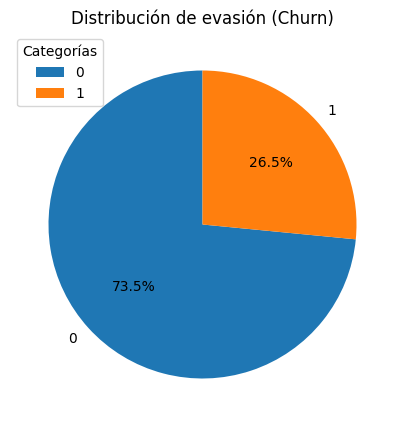

In [141]:
graficar_pie(evasion,'Distribución de evasión (Churn)')

### Evasion por categoria

In [149]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int8   
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int8   
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [157]:
churn_por_genero = datos_limpio.groupby(['customer_gender', 'churn']).size().unstack(fill_value=0)
print(churn_por_genero)

churn               0    1
customer_gender           
Female           2549  939
Male             2625  930


In [182]:
def graficar_churn_barras_agregado(df_agregado, titulo='Churn por categoría',
                                   xlabel='Categoría', ylabel='Cantidad de clientes',
                                   stacked=False, colores=['lightgreen','lightcoral']):

    ax = df_agregado.plot(kind='bar', stacked=stacked, color=colores, figsize=(6,4))
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Churn', labels=['No', 'Sí'])

    for p in ax.patches:
      height = p.get_height() if not stacked else p.get_height()
      ax.text(p.get_x() + p.get_width()/2., p.get_y() + height + 0.1,
              int(height), ha="center", va='bottom')
    plt.show()

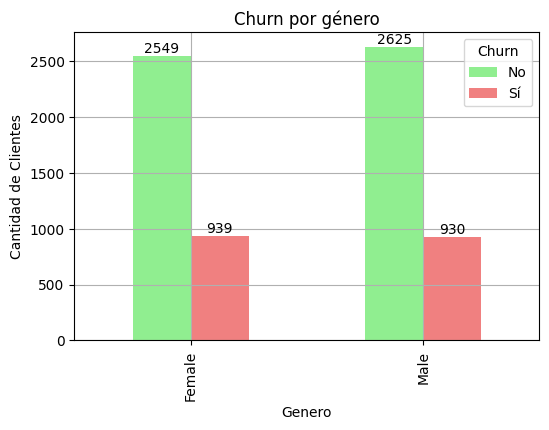

In [183]:
graficar_churn_barras_agregado(churn_por_genero,'Churn por género','Genero','Cantidad de Clientes')

In [185]:

distri_por_tipo_contrato= datos_limpio.groupby([ 'account_contract', 'churn']).size().unstack(fill_value=0)



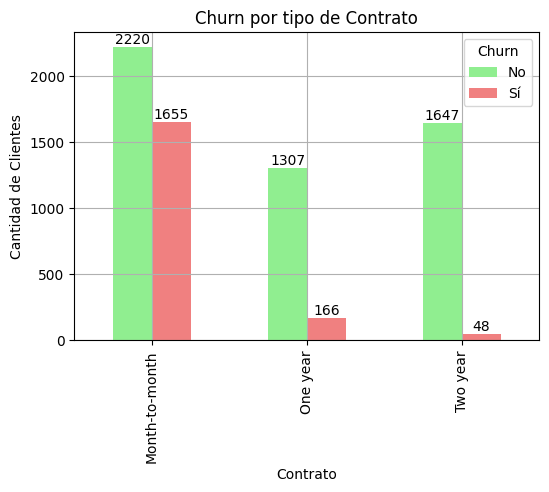

In [186]:
graficar_churn_barras_agregado(distri_por_tipo_contrato,'Churn por tipo de Contrato','Contrato','Cantidad de Clientes')

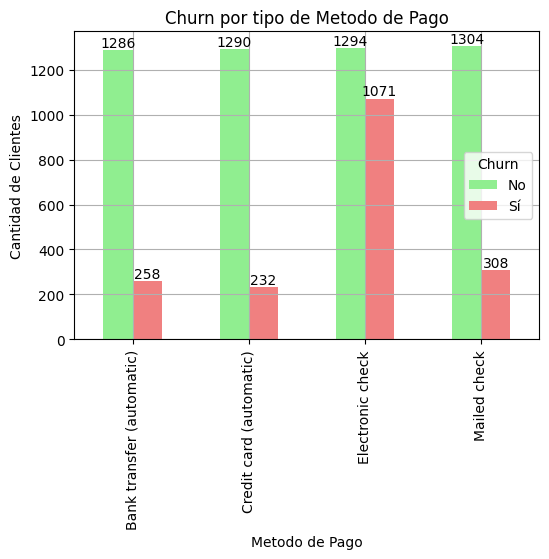

In [187]:
distri_por_metodo_pago= datos_limpio.groupby([ 'account_paymentmethod', 'churn']).size().unstack(fill_value=0)
graficar_churn_barras_agregado(distri_por_metodo_pago,'Churn por tipo de Metodo de Pago','Metodo de Pago','Cantidad de Clientes')

#📊 Carga y análisis

## Analisis

In [188]:
datos_limpio.describe()

,churn,customer_seniorcitizen,customer_tenure,phone_phoneservice,account_paperlessbilling,account_charges_monthly,cuenta_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,32.371149,0.903166,0.592219,64.761692,2.158675
std,0.441561,0.368612,24.559481,0.295752,0.491457,30.090047,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,1.180000
50%,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.340000
75%,1.000000,0.000000,55.000000,1.000000,1.000000,89.850000,2.990000
max,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.960000


#📄Informe final